In [1]:
import rebound
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
rebound.__build__

'Nov  2 2023 10:56:31'

In [2]:
from names import *
diameter = np.array([4879,12104,12756,6792,142984,120536,51118,49528,2376]) #km
semia = np.array([57.9,108.2,149.6,228.0,778.5,1432.0,2867.0,4515.0,5906.4]) # semia in 1e6km
plabels = np.array(["☿", "♀", "♁", "♂", "♃", "♄", "⛢", "♆", "♇"])

# 1 eccentric planet

In [3]:
mindt = 1e300
def hb(simp):
    global mindt
    dt = simp.contents.dt
    if dt<mindt:
        mindt = dt
def run(e,adaptive_mode,offset=0):
    global mindt
    mindt = 1e300
    sim = rebound.Simulation()
    sim.heartbeat = hb
    sim.ri_ias15.min_dt = 1e-10
    sim.ri_ias15.adaptive_mode = adaptive_mode
    sim.add(m=1)
    sim.add(a=1,e=e,f=np.pi)
    sim.dt=0.5
    sim.particles[0].x+=offset
    sim.particles[1].x+=offset
    sim.integrate(np.pi*2.)
    return mindt, np.fabs(sim.particles[1].a-1)

offsets = np.logspace(-3,9,30)
#offsets = np.logspace(-3,9,30)
es = 1.-np.logspace(-4,0,50)
mindts1 = np.zeros((len(es),len(offsets)))
mindts2 = np.zeros((len(es),len(offsets)))
mindts3 = np.zeros((len(es),len(offsets)))
as1 = np.zeros((len(es),len(offsets)))
as2 = np.zeros((len(es),len(offsets)))
as3 = np.zeros((len(es),len(offsets)))

for i in range(len(es)):
    for j in range(len(offsets)):
        mindts1[i,j],as1[i,j] = run(es[i],adaptive_mode=1,offset=offsets[j])
        mindts2[i,j],as2[i,j] = run(es[i],adaptive_mode=2,offset=offsets[j])
        mindts3[i,j],as3[i,j] = run(es[i],adaptive_mode=3,offset=offsets[j])

/Users/rein/git/rebound/rebound/simulation.py:1087: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


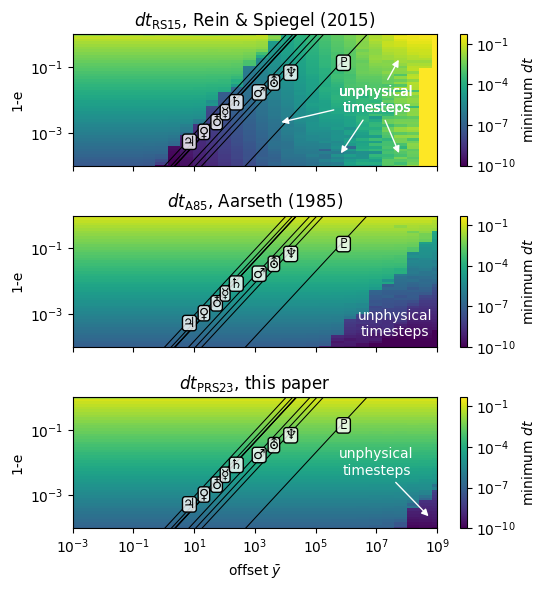

In [39]:
fig, ax = plt.subplots(3,1,sharex=True, sharey=True,figsize=(5.6,6))
for _ax in ax:
    _ax.set_ylabel("1-e")
ax[-1].set_xlabel(r"offset $\bar y$")

X,Y=np.meshgrid(offsets,1-es)
ln=LogNorm()
im = ax[0].pcolor(X,Y,mindts1, cmap='viridis',norm=ln)
fig.colorbar (im, label="minimum $dt$")

im = ax[1].pcolor(X,Y,mindts3, cmap='viridis', norm=ln)
fig.colorbar(im, label="minimum $dt$")

im = ax[2].pcolor(X,Y,mindts2, cmap='viridis', norm=ln)
fig.colorbar(im, label="minimum $dt$")


ax[0].set_title(labelold)
ax[1].set_title(labelA85)
ax[2].set_title(labelnew)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(offsets[0],offsets[-1])
ax[0].set_ylim(1-es[0],1-es[-1])

offsetsL = np.logspace(np.log10(np.min(offsets[0])),np.log10(np.min(offsets[-1])),300)
ratio = diameter/2e6/semia # radius/semia
sratio = np.argsort(ratio)[::-1]
splabels = plabels[sratio]
sratio = ratio[sratio]
for _ax in ax:
    for k in range(len(diameter)):
        _ax.plot(offsetsL,sratio[k]*offsetsL, color="black",lw=0.75)
        _ax.text(2**k*4e-4/sratio[k], 2**k*4e-4, splabels[k],bbox=dict(facecolor=(1,1,1,0.8), edgecolor='black', 
                                                                           boxstyle='round,pad=0.05,rounding_size=0.2'))

#ax[0].text(1e7, 1e-2, "unphysical\ntimesteps", color="white", rotation=0, horizontalalignment="center", verticalalignment="center", rotation_mode="anchor")        

ax[0].annotate("unphysical\ntimesteps", xy=(6e7, 2e-4), xytext=(1e7, 1e-2), color="white", rotation=0,
                         horizontalalignment="center", verticalalignment="center", rotation_mode="anchor",
              arrowprops=dict(color="white", arrowstyle= '-|>'))        

ax[0].annotate("unphysical\ntimesteps", xy=(6e5, 2e-4), xytext=(1e7, 1e-2), color="white", rotation=0,
                         horizontalalignment="center", verticalalignment="center", rotation_mode="anchor",
              arrowprops=dict(color="white", arrowstyle= '-|>'))        

ax[0].annotate("unphysical\ntimesteps", xy=(6e7, 2e-1), xytext=(1e7, 1e-2), color="white", rotation=0,
                         horizontalalignment="center", verticalalignment="center", rotation_mode="anchor",
              arrowprops=dict(color="white", arrowstyle= '-|>'))        

ax[0].annotate("unphysical\ntimesteps", xy=(6e3, 2e-3), xytext=(1e7, 1e-2), color="white", rotation=0,
                         horizontalalignment="center", verticalalignment="center", rotation_mode="anchor",
              arrowprops=dict(color="white", arrowstyle= '-|>'))        



ax[1].text(4e7, 0.5e-3, "unphysical\ntimesteps", color="white", rotation=0,
                         horizontalalignment="center", verticalalignment="center", rotation_mode="anchor")        



ax[2].annotate("unphysical\ntimesteps", xy=(6e8, 2e-4), xytext=(1e7, 1e-2), color="white", rotation=0,
                         horizontalalignment="center", verticalalignment="center", rotation_mode="anchor",
              arrowprops=dict(color="white", arrowstyle= '-|>'))        

        
fig.tight_layout()
fig.savefig("offset.png",dpi=500)